In [1]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# load the dataet
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# check the general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# This shows the dataset has 9 columns and each column has 768 entries. Additionally, there is no any missing values

In [9]:
# descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
#check for the missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Observation:
There is no missing values

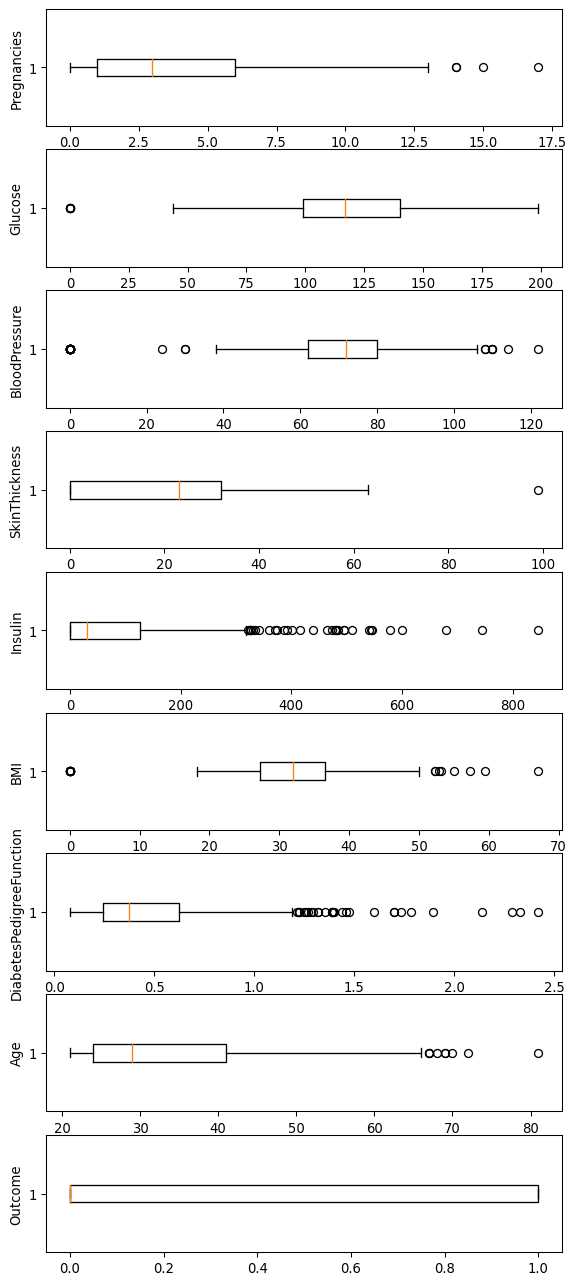

In [12]:
# Check the outliers
fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0
for column in df.columns:
    axs[i].boxplot(df[column],vert=False)
    axs[i].set_ylabel(column)
    i +=1
plt.show()

In [13]:
# It is clear that almost all the column has some amount of outliers

# Drop the outliers

In [14]:
# Identify the quartiles
q1, q3 = np.percentile(df['Insulin'], [25, 75])

In [16]:
print(q1, q3)

0.0 127.25


In [19]:
#This can be calculated in another way also
first, third = np.quantile(df['Insulin'], [0.25, 0.75])

In [20]:
print(first, third)

0.0 127.25


In [22]:
# Inter quartile Range
IQR = q3 - q1
print(IQR)

127.25


In [23]:
# Calculate the lower and upper bound
lower_fence = q1 - (1.5*IQR)
upper_fence = q1 + (1.5*IQR)

In [24]:
print(lower_fence, upper_fence)

-190.875 190.875


# Data Cleaning

In [25]:
# Drop the outliers from Insulin column
clean_insulin = df[(df['Insulin'] >= lower_fence) &
                  df['Insulin'] <= upper_fence]

In [28]:
clean_insulin.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Correlation

<Axes: >

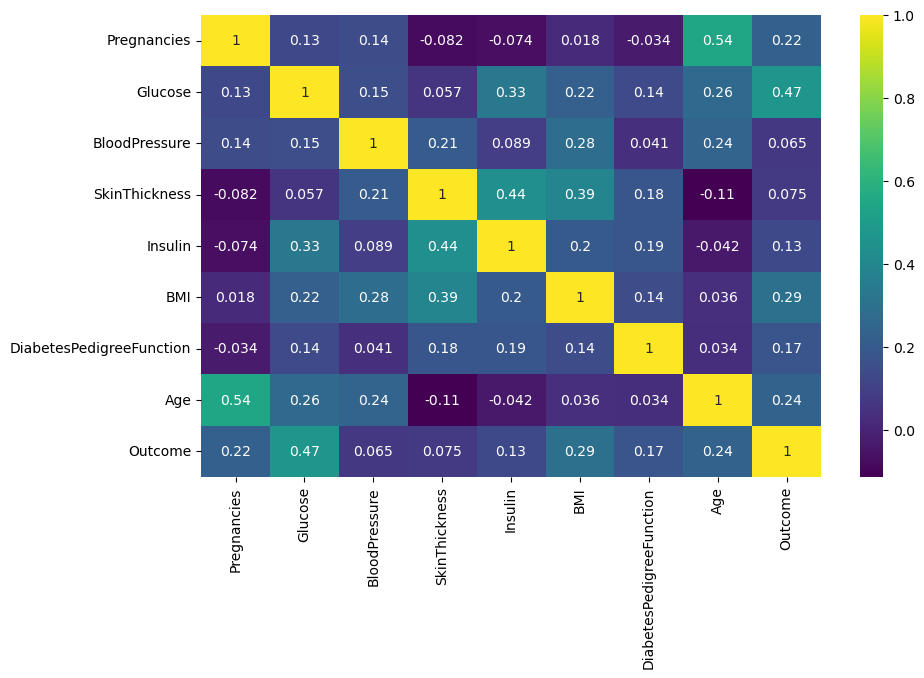

In [32]:
plt.figure(figsize=(10,6))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, cmap='viridis')

In [33]:
# We can also compare by single columns in descending order

In [35]:
corrMatrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [38]:
# df.Outcome.value_counts().unique()

array([500, 268], dtype=int64)

In [39]:
type(df.Outcome)

pandas.core.series.Series

In [40]:
type(df['Outcome'])

pandas.core.series.Series

In [41]:
type(df[['Outcome']])

pandas.core.frame.DataFrame

In [42]:
type(df['Outcome'].value_counts())

pandas.core.series.Series

In [36]:
# Check Outcomes Proportionality
# Pie-Chart 

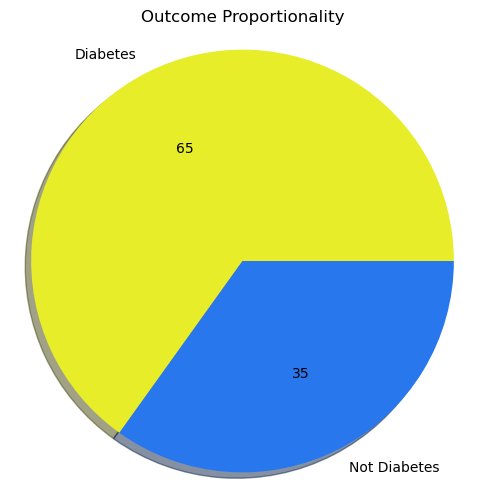

In [49]:
plt.figure(figsize=(6,6))
colors = ['#e7ed28', '#2877ed'] # create a custom color palette
sns.set_palette(colors)
plt.pie(df.Outcome.value_counts(),
       labels = ['Diabetes', 'Not Diabetes'],
       autopct = '%.f', shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.title("Outcome Proportionality")
plt.show()

# Separate independent features and target variables

In [65]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [61]:
#This can be done in another way
# X = df.iloc[:,:-1]
# y= df.iloc[:,-1]

# Normalization or Standardization

In [66]:
# Normalization:
# MinMaxScaler: Min Max Scaler scales the data so that feature lie between 0 and 1 

In [70]:
#import the library
# from sklearn.preprocessing import MinMaxScaler

#initiate the minmaxscaler
# In fact, it is not necessary to set the range
scaler = MinMaxScaler(feature_range=(0,1))

In [75]:
rescaled_X = scaler.fit_transform(X)
rescaled_X[:5]

array([[0.35294118, 0.74371859, 0.59016393, 0.35353535, 0.        ,
        0.50074516, 0.23441503, 0.48333333],
       [0.05882353, 0.42713568, 0.54098361, 0.29292929, 0.        ,
        0.39642325, 0.11656704, 0.16666667],
       [0.47058824, 0.91959799, 0.52459016, 0.        , 0.        ,
        0.34724292, 0.25362938, 0.18333333],
       [0.05882353, 0.44723618, 0.54098361, 0.23232323, 0.11111111,
        0.41877794, 0.03800171, 0.        ],
       [0.        , 0.68844221, 0.32786885, 0.35353535, 0.19858156,
        0.64232489, 0.94363792, 0.2       ]])

In [76]:
# Standarization:
# Standardization is a useful technique to transform attributes with a Gaussian 
distribution and differing means and standard deviations to 
#a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

In [77]:
# use of standardscaler to rescale the X
from sklearn.preprocessing import StandardScaler

# create the instance
scaler = StandardScaler()
rescaled_X = scaler.fit_transform(X)

rescaled_X[:5]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ]])